In [1]:
PATH = "/home/ubuntu/data/foster/ch03_04/z_points.txt"
TARGET_PATH = "/home/ubuntu/data/foster/ch03_04/targets.txt"

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_points(path):
    xs = []
    ys = []
    for line in open(path):
        line = line.strip()
        tokens = line.split()
        x = float(tokens[0])
        y = float(tokens[1])
        xs.append(x)
        ys.append(y)
    return xs, ys

In [4]:
xs, ys  = load_points(PATH)
print(len(xs))

5000


In [19]:
from scipy.stats import norm
import numpy as np

z_points = np.empty((len(xs), 2))
for i, (x, y) in enumerate(zip(xs, ys)):
    z_points[i] = np.array([x, y])
p_points = norm.cdf(z_points)
print(p_points.shape)

(5000, 2)


In [5]:
max_xvalue = max(xs)
min_xvalue = min(xs)
max_yvalue = max(ys)
min_yvalue = min(ys)
print(max_xvalue, min_xvalue, max_yvalue, min_yvalue)

3.64343 -3.55252 4.11573 -3.11852


In [6]:
ts = []
for line in open(TARGET_PATH):
    line = int(line.strip())
    ts.append(line)

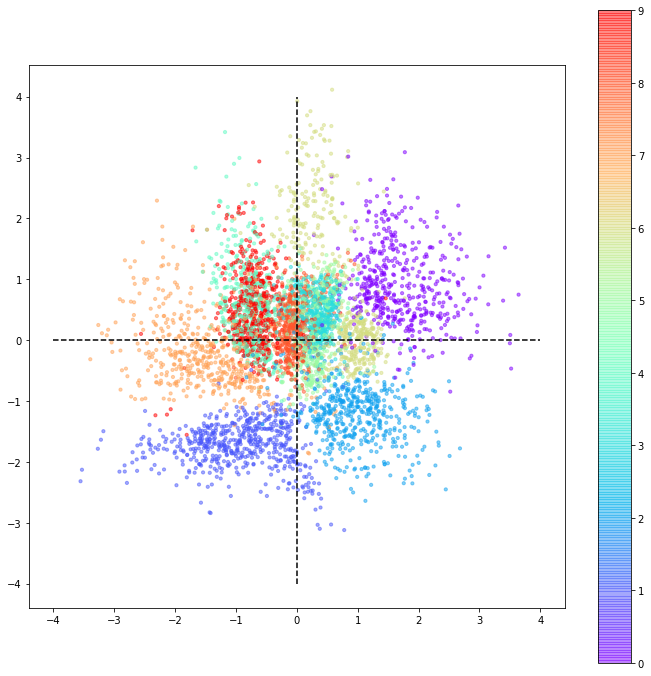

In [7]:
plt.figure(figsize=(12, 12))
plt.scatter(xs, ys, cmap='rainbow', c=ts,  alpha=0.5, s=10)
plt.vlines([0], ymin=-4, ymax=4, linestyle="dashed")
plt.hlines([0], xmin=-4, xmax=4, linestyle="dashed")
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

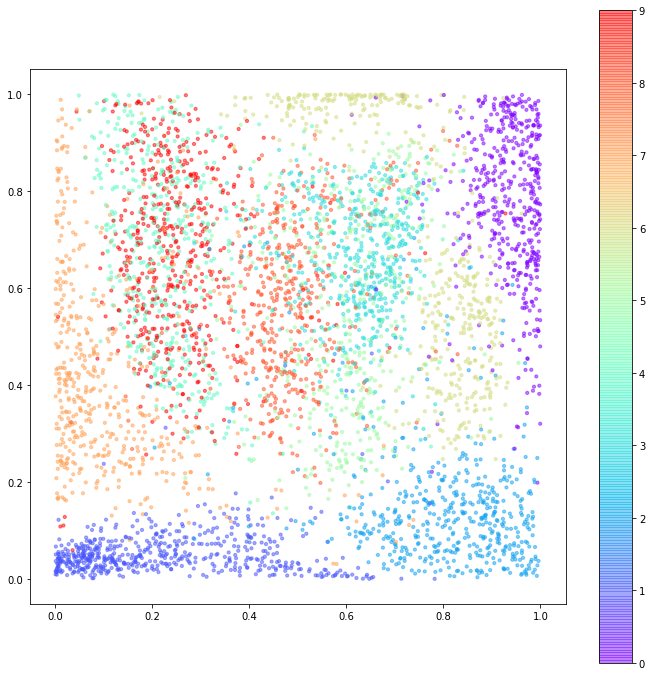

In [22]:
plt.figure(figsize=(12, 12))
plt.scatter(p_points[:, 0], p_points[:, 1], cmap='rainbow', c=ts,  alpha=0.5, s=10)
# plt.vlines([0], ymin=-4, ymax=4, linestyle="dashed")
# plt.hlines([0], xmin=-4, xmax=4, linestyle="dashed")
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

In [8]:
GENERATED_POINTS_PATH = "/home/ubuntu/data/foster/ch03_04/grid/grid_points.txt"

In [9]:
generated_xs, generated_ys  = load_points(GENERATED_POINTS_PATH )

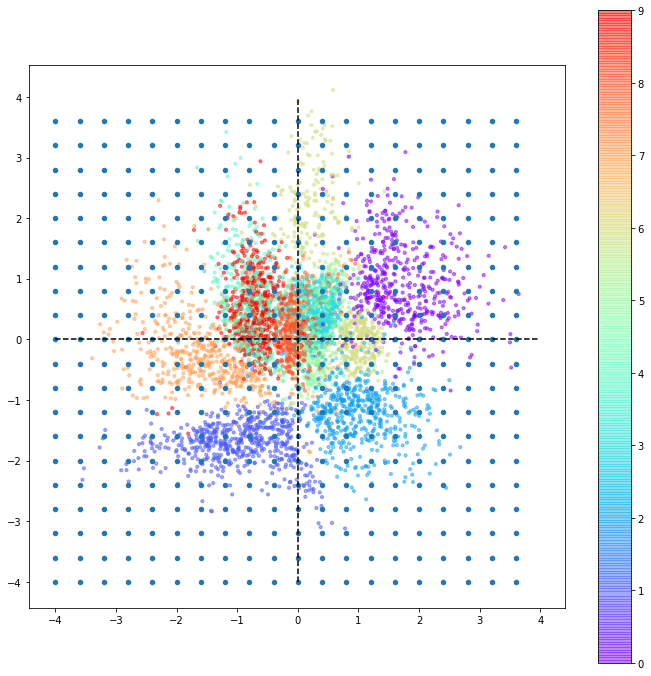

In [10]:
plt.figure(figsize=(12, 12))
plt.scatter(xs, ys, cmap='rainbow', c=ts,  alpha=0.5, s=10)
plt.colorbar()
plt.scatter(generated_xs, generated_ys, s=20)
# plt.legend(loc="best")
plt.gca().set_aspect('equal', adjustable='box')
plt.vlines([0], ymin=-4, ymax=4, linestyle="dashed")
plt.hlines([0], xmin=-4, xmax=4, linestyle="dashed")
plt.show()

In [11]:
import os
from PIL import Image

GRID_IMAGE_DIR_PATH = "/home/ubuntu/data/foster/ch03_04/grid"
images = []
for i  in range(400):
    name = "grid_" + str(i).zfill(3) + ".jpg"
    path = os.path.join(GRID_IMAGE_DIR_PATH, name)
    image = Image.open(path)
    images.append(image)

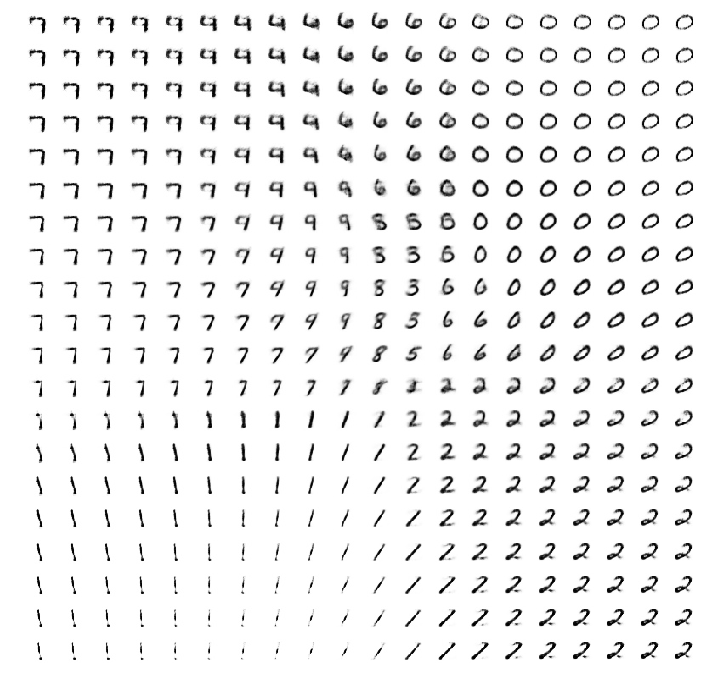

In [12]:
figsize = 12
fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
grid_size = 20
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(images[i], cmap = 'Greys')